<a href="https://colab.research.google.com/github/sanchesprogramer/Inteligencia-Artificial/blob/main/C%C3%B3pia_de_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [207]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Pasta1.csv", sep = ";")

In [208]:
dataset.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,168.8,64.1,48.8,dohc,4,130,mpfi,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,2.0,convertible,rwd,front,168.8,64.1,48.8,dohc,4,130,mpfi,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,171.2,65.5,52.4,ohcv,6,152,mpfi,154.0,5000.0,19,26,16500.0
3,audi,gas,std,4.0,sedan,fwd,front,176.6,66.2,54.3,ohc,4,109,mpfi,102.0,5500.0,24,30,13950.0
4,audi,gas,std,4.0,sedan,4wd,front,176.6,66.4,54.3,ohc,5,136,mpfi,115.0,5500.0,18,22,17450.0


In [225]:
dataset = dataset[~dataset.isin(['?', np.nan]).any(axis=1)]
dataset

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,168.8,64.1,48.8,dohc,4,130,mpfi,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,2.0,convertible,rwd,front,168.8,64.1,48.8,dohc,4,130,mpfi,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,171.2,65.5,52.4,ohcv,6,152,mpfi,154.0,5000.0,19,26,16500.0
3,audi,gas,std,4.0,sedan,fwd,front,176.6,66.2,54.3,ohc,4,109,mpfi,102.0,5500.0,24,30,13950.0
4,audi,gas,std,4.0,sedan,4wd,front,176.6,66.4,54.3,ohc,5,136,mpfi,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4.0,sedan,rwd,front,188.8,68.9,55.5,ohc,4,141,mpfi,114.0,5400.0,23,28,16845.0
201,volvo,gas,turbo,4.0,sedan,rwd,front,188.8,68.8,55.5,ohc,4,141,mpfi,160.0,5300.0,19,25,19045.0
202,volvo,gas,std,4.0,sedan,rwd,front,188.8,68.9,55.5,ohcv,6,173,mpfi,134.0,5500.0,18,23,21485.0
203,volvo,diesel,turbo,4.0,sedan,rwd,front,188.8,68.9,55.5,ohc,6,145,idi,106.0,4800.0,26,27,22470.0


In [210]:
dataset.shape

(197, 19)

In [211]:
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
df_one_hot = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)
df_one_hot

['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']


,num-of-doors,length,width,height,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2.0,168.8,64.1,48.8,4,130,111.0,5000.0,21,27,...,False,False,False,False,False,False,False,True,False,False
1,2.0,168.8,64.1,48.8,4,130,111.0,5000.0,21,27,...,False,False,False,False,False,False,False,True,False,False
2,2.0,171.2,65.5,52.4,6,152,154.0,5000.0,19,26,...,False,True,False,False,False,False,False,True,False,False
3,4.0,176.6,66.2,54.3,4,109,102.0,5500.0,24,30,...,False,False,False,False,False,False,False,True,False,False
4,4.0,176.6,66.4,54.3,5,136,115.0,5500.0,18,22,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.0,188.8,68.9,55.5,4,141,114.0,5400.0,23,28,...,False,False,False,False,False,False,False,True,False,False
201,4.0,188.8,68.8,55.5,4,141,160.0,5300.0,19,25,...,False,False,False,False,False,False,False,True,False,False
202,4.0,188.8,68.9,55.5,6,173,134.0,5500.0,18,23,...,False,True,False,False,False,False,False,True,False,False
203,4.0,188.8,68.9,55.5,6,145,106.0,4800.0,26,27,...,False,False,False,False,False,True,False,False,False,False


In [212]:
scaler = MinMaxScaler()
numeric_cols = df_one_hot.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_one_hot[numeric_cols] = scaler.fit_transform(df_one_hot[numeric_cols])
df_one_hot.columns

Index(['num-of-doors', 'length', 'width', 'height', 'num-of-cylinders',
       'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_gas', 'aspiration_turbo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_2bbl',
       'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

In [213]:
atibutos = df_one_hot.drop('highway-mpg', axis=1)
variavel_alvo = df_one_hot['highway-mpg']
print(variavel_alvo)
X_train, X_test, y_train, y_test = train_test_split(atibutos, variavel_alvo, test_size=0.3, random_state=42, stratify=variavel_alvo)
print(f"Treinamento: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

0      0.354839
1      0.354839
2      0.322581
3      0.451613
4      0.193548
         ...   
200    0.387097
201    0.290323
202    0.225806
203    0.354839
204    0.290323
Name: highway-mpg, Length: 197, dtype: float64
Treinamento: 137 amostras
Teste: 60 amostras


In [214]:
#Regressão Logística
atibutos = df_one_hot.drop('aspiration_turbo', axis=1)
variavel_alvo = df_one_hot['aspiration_turbo']
X_train, X_test, y_train, y_test = train_test_split(atibutos, variavel_alvo, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", class_report)

Matriz de Confusão:
 [[49  0]
 [ 7  4]]
Acurácia: 0.8833333333333333
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.88      1.00      0.93        49
        True       1.00      0.36      0.53        11

    accuracy                           0.88        60
   macro avg       0.94      0.68      0.73        60
weighted avg       0.90      0.88      0.86        60



In [215]:
#k-Vizinhos Mais Próximos
# Separar atributos e variável alvo
atibutos = dataset.drop('fuel-type', axis=1)
variavel_alvo = dataset['fuel-type']  # Variável alvo categórica

# Aplicar One-Hot Encoding nas variáveis categóricas
atibutos_encoded = pd.get_dummies(atibutos, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(atibutos_encoded, variavel_alvo, test_size=0.3, random_state=42)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Definindo k=3
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", class_report)

Matriz de Confusão:
 [[ 2  3]
 [ 2 53]]
Acurácia: 0.9166666666666666
Relatório de Classificação:
               precision    recall  f1-score   support

      diesel       0.50      0.40      0.44         5
         gas       0.95      0.96      0.95        55

    accuracy                           0.92        60
   macro avg       0.72      0.68      0.70        60
weighted avg       0.91      0.92      0.91        60



0      0.354839
1      0.354839
2      0.322581
3      0.451613
4      0.193548
         ...   
200    0.387097
201    0.290323
202    0.225806
203    0.354839
204    0.290323
Name: highway-mpg, Length: 197, dtype: float64
Treinamento: 137 amostras
Teste: 60 amostras


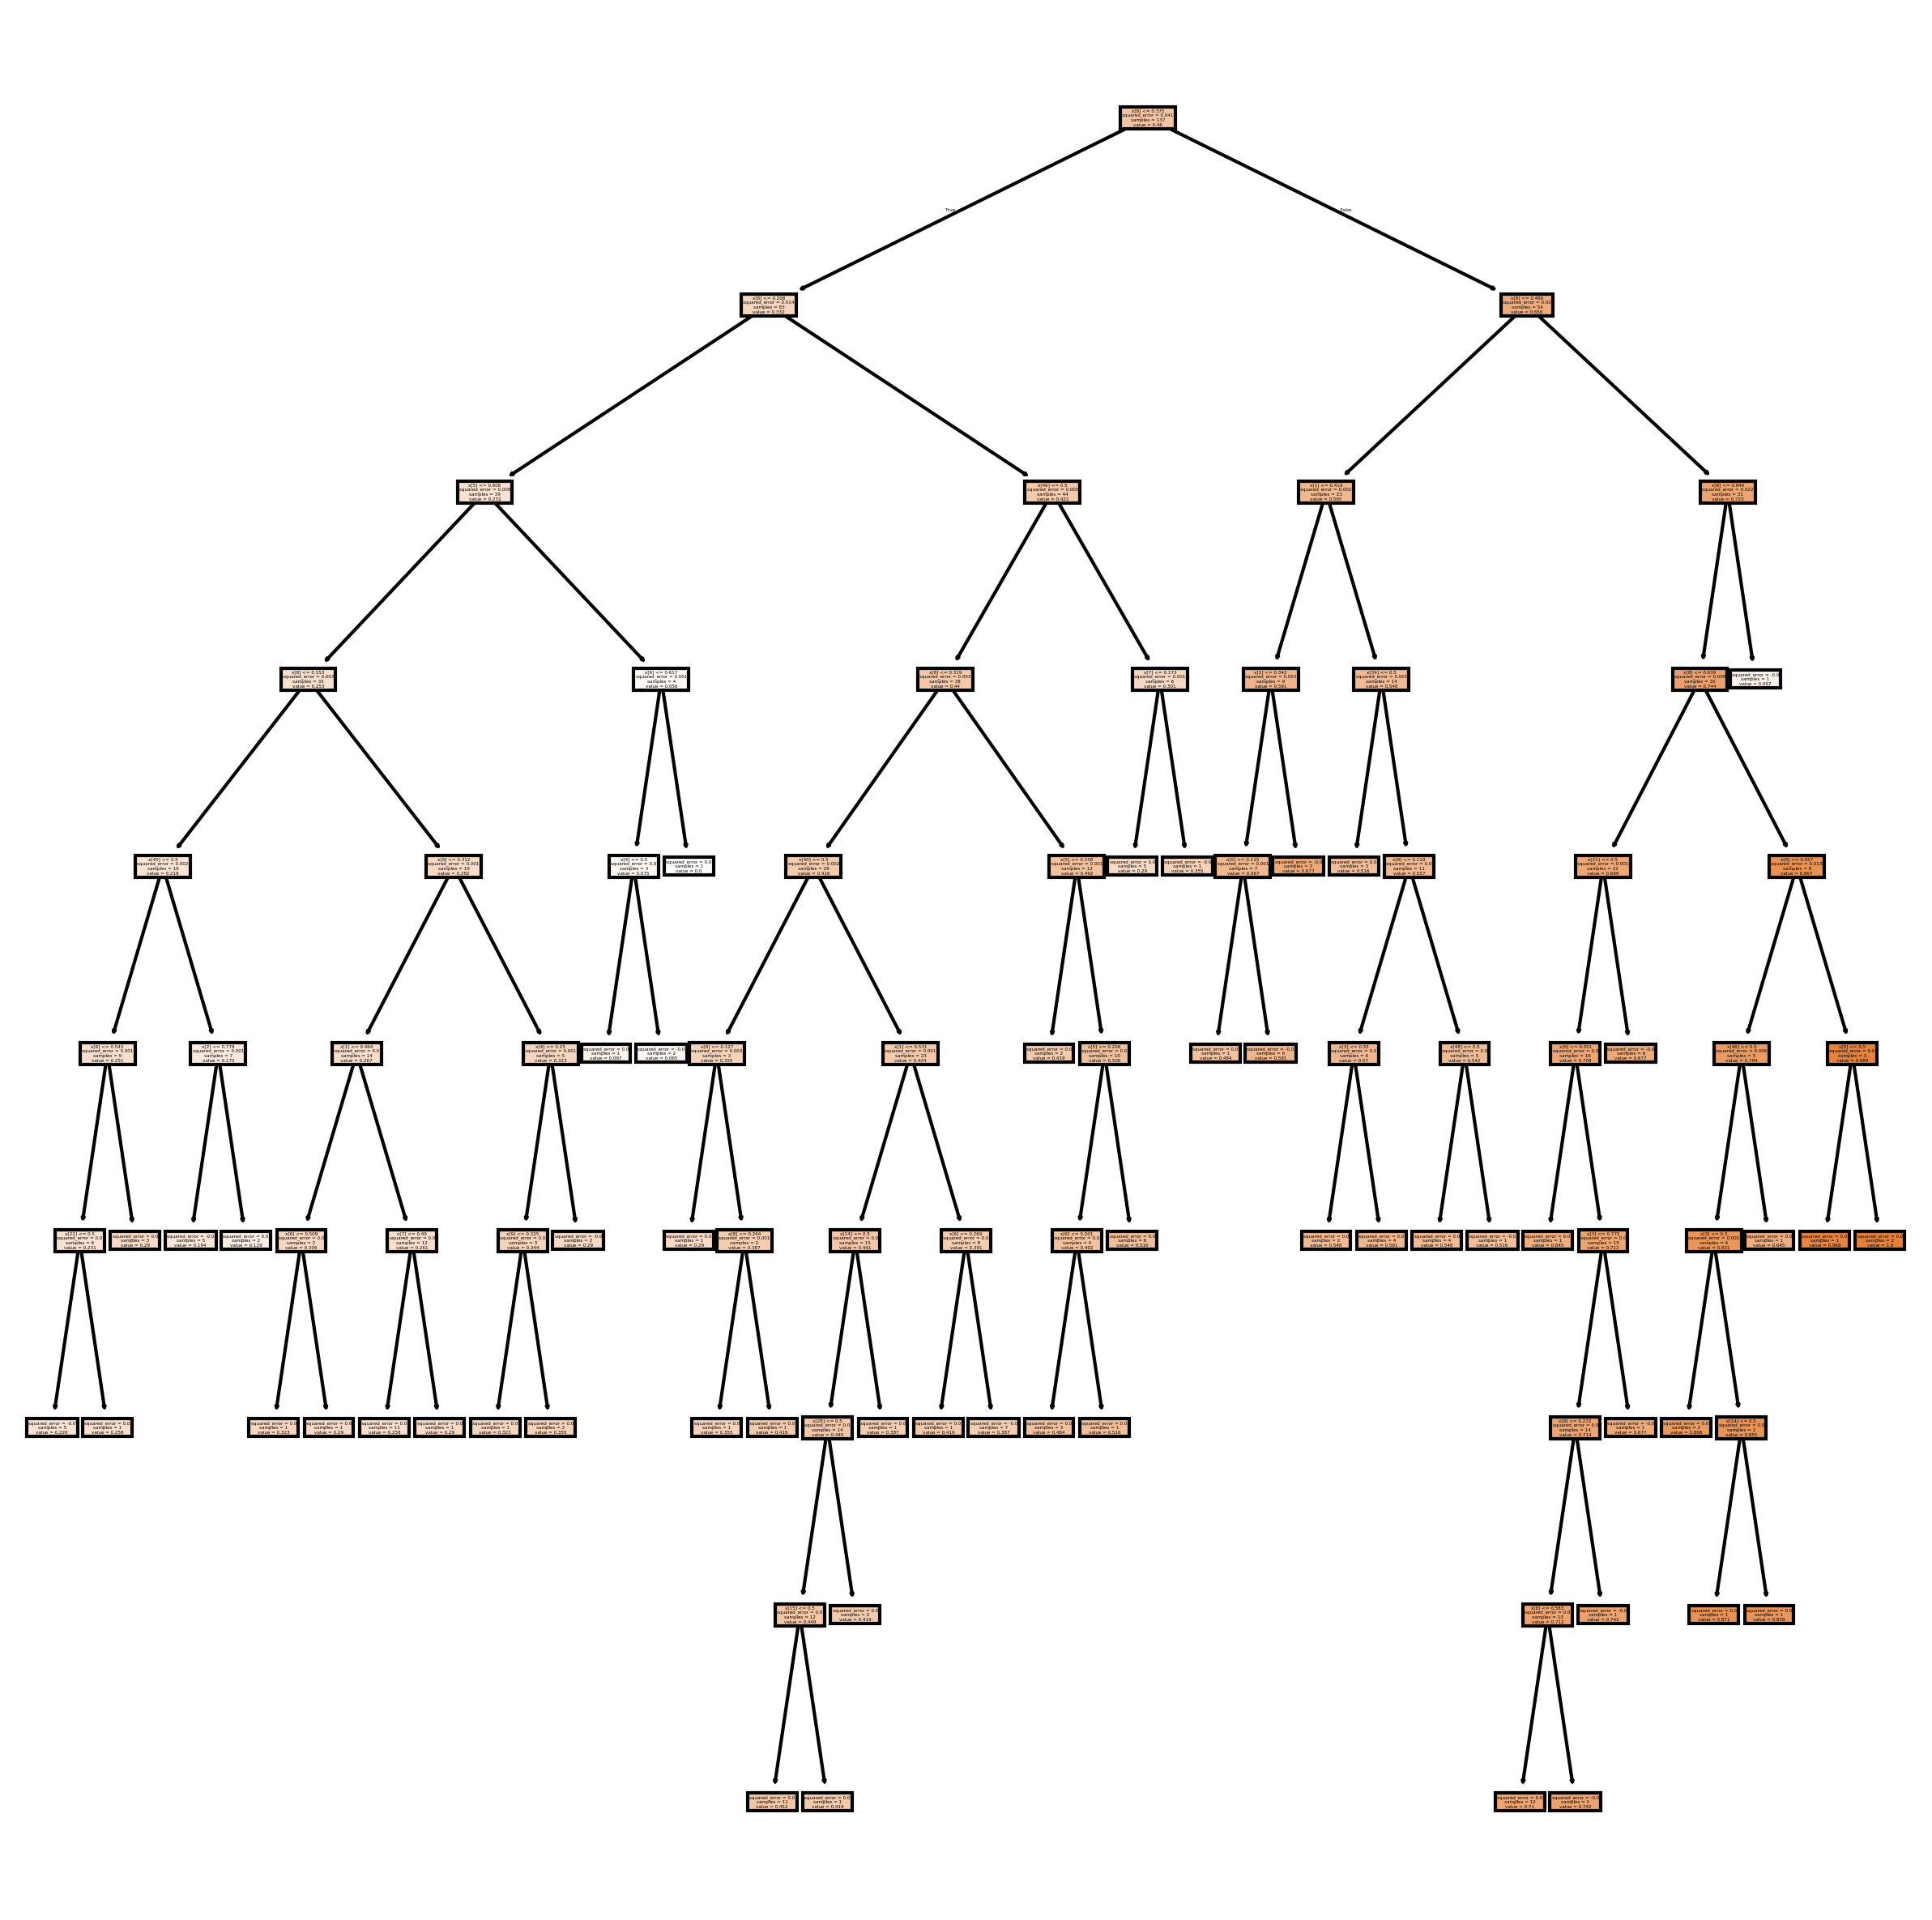

In [217]:
#Decision Tree
atibutos = df_one_hot.drop('highway-mpg', axis=1)
variavel_alvo = df_one_hot['highway-mpg']
print(variavel_alvo)
X_train, X_test, y_train, y_test = train_test_split(atibutos, variavel_alvo, test_size=0.3, random_state=42, stratify=variavel_alvo)
print(f"Treinamento: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
regressor = tree.DecisionTreeRegressor(criterion='squared_error')  # Use 'squared_error' em vez de 'mse'
regressor.fit(X_train, y_train)

# Para visualização, você pode usar a árvore de decisão
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=300)
tree.plot_tree(regressor, filled=True)
fig.savefig('imagename.png')
plt.show()

In [222]:
#Floresta Aleatória
# Separar atributos e variável alvo
atibutos = dataset.drop('highway-mpg', axis=1)
variavel_alvo = dataset['highway-mpg']  # Variável alvo categórica

# Aplicar One-Hot Encoding nas variáveis categóricas
atibutos_encoded = pd.get_dummies(atibutos, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(atibutos_encoded, variavel_alvo, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Floresta Aleatória
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", class_report)

Matriz de Confusão:
 [[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 1 0 0]
 [0 0 1 0 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [233]:
#Gradient Boosting
variavel_alvo = df_one_hot['fuel-type_gas']  # Exemplo: se você estiver prevendo se é 'gas' ou não

# Remover a coluna da variável alvo dos atributos
atibutos = df_one_hot.drop(['fuel-type_gas'], axis=1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(atibutos, variavel_alvo, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões
y_pred = gb_model.predict(X_test)

# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", class_report)

Matriz de Confusão:
 [[ 5  0]
 [ 0 55]]
Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         5
        True       1.00      1.00      1.00        55

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

